In [38]:
#Now that you've learned about random forests and decision trees let's do an exercise in accuracy. 
#You know that random forests are basically a collection of decision trees. 
#But how do the accuracies of the two models compare?

#So here's what you should do. Pick a dataset. It could be one you've worked with before or it could be a new one. 
#Then build the best decision tree you can.

#Now try to match that with the simplest random forest you can. For our purposes measure simplicity with runtime. 
#Compare that to the runtime of the decision tree. This is imperfect but just go with it.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn import cross_validation

In [41]:
#use the titanic data set
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [42]:
#view dataset, the goal is to predict the surviver of the titanic based on the Pclass
#0, means they didn't survive 1 means they did survive
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
#clean the dataset
#fill na values of Age and Fare with median value. 
#Fill na values of S for Embarked

def data_cleaning(train):
    train['Age'] = train['Age'].fillna(train['Age'].median())
    train['Fare'] = train['Fare'].fillna(train['Fare'].median())   
    train['Embarked'] = train['Embarked'].fillna('S')
    
 # change value of gender to numerical value of 0 or 1
    train.loc[train['Sex'] == 'male', 'Sex'] = 0 
    train.loc[train['Sex'] == 'female','Sex'] = 1
    
  # change value of Embarked to numerical value of 0, 1 or 2 
    train.loc[train['Embarked'] == 'S', 'Embarked'] = 0
    train.loc[train['Embarked'] == 'C', 'Embarked'] = 1
    train.loc[train['Embarked'] == 'Q', 'Embarked'] = 2

    return train

In [44]:
#call the data cleaning function for train and test
train = data_cleaning(train)
test = data_cleaning(test)

In [45]:
#Choose the predictor variable 
predictor_vars = ['Sex','Age','SibSp','Parch','Fare']

In [46]:
#assign predictor variable to X
#assign survived to Y
X, y = train[predictor_vars], train.Survived

In [47]:
#check the first 5 rows of the X predictor variable
X.head()

,Sex,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [48]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [62]:
#initiate the random forest classifier
rfc = ensemble.RandomForestClassifier(max_depth=3)

#Execute the cross validaton function on the classifer
random_cross_validation = cross_val_score(rfc, X, y, cv=10)

In [63]:
#show cross validation accuracy
random_cross_validation

array([0.82222222, 0.82222222, 0.7752809 , 0.87640449, 0.82022472,
       0.78651685, 0.80898876, 0.73033708, 0.79775281, 0.80681818])

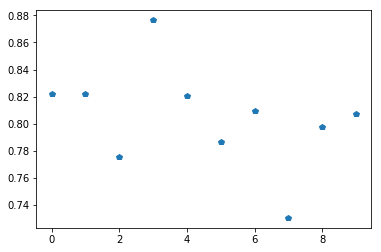

In [64]:
#plot the cross validation accuracy data points
plt.plot(random_cross_validation, 'p')
plt.show()